In [1]:
# set up packages and data
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy

# set plotting resolution
dpi_out = 600 # lower res for drafts, higher res for final submission
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Verdana']})

# calculate d18O_0, need to filter for things above x mm/day
thres = 0.1 # mm/day 
thres_mps = thres*(1/86400)*(1/1000) # convert mm/day -> m/s

ds = xr.open_dataset("../proc_data/iCAM6_nudg_monthly.nc", decode_timedelta = False)
ds_weighted = xr.open_dataset("../proc_data/iCAM6_nudg_WgtSeasAvg.nc", decode_timedelta = False)
ds_p1 = xr.open_dataset("../proc_data/iCAM6_nudg_AnnAvg.nc", decode_timedelta = False)
monthly_avr = xr.open_dataset('../proc_data/iCAM6_nudg_MonAvg.nc', decode_timedelta = False)

### D-excess testing

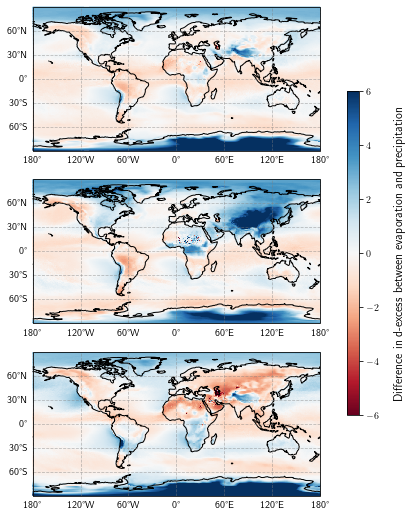

In [2]:
# Figure 17: change in d-excess from evaporation 

# now make the map plots:
fig = plt.figure(figsize=(9,9))

grid = gridspec.GridSpec(nrows = 3,
                        ncols = 1,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "RdBu"

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid

# now make the map plots:
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im = ds_p1.mean_dxsdiff.plot(ax = ax1,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = -6,
                     vmax = 6,
                     add_colorbar = False)

ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_weighted['dxs_diff'].sel(season="DJF").plot(ax = ax2,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = -6,
                     vmax = 6,
                     add_colorbar = False)

ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_weighted['dxs_diff'].sel(season="JJA").plot(ax = ax3,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = -6,
                     vmax = 6,
                     add_colorbar = False)

ax1.set_title('')
ax2.set_title('')
ax3.set_title('')

fig.subplots_adjust(right=0.95, wspace=0.02, hspace=0.2)
cb_ax = fig.add_axes([0.80, 0.25, 0.02, 0.5])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("Difference in d-excess between evaporation and precipitation", rotation = 90, size = 'large', labelpad = 15)

#plt.savefig('plots/fig16.png',dpi=dpi_out,bbox_inches='tight')

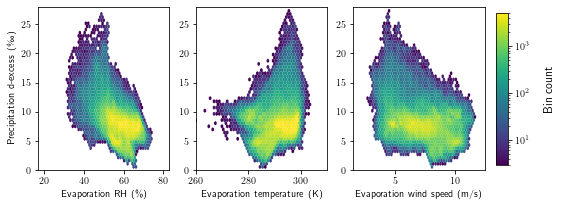

In [3]:
# fig 13: scatter plots between d-excess, T, RH, ws
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(8,3))

#ds_p1.plot.scatter('mean_RH','mean_dxs',ax=axes[0])
ax1.set(ylim=(0,28))
ax2.set(ylim=(0,28))
ax3.set(ylim=(0,28))

ax1.hexbin('PRECTrhsrf','PRECT_dxs',data=monthly_avr.sel(lat = slice(-70, None)),
           mincnt=3, gridsize = 50,
           linewidths = 0.01,
           extent = (20,80,0,30),
           norm = mpl.colors.LogNorm(3,5000))
ax1.set_xlabel('Evaporation RH (\%)')
ax1.set_ylabel('Precipitation d-excess (‰)')
#ds_p1.plot.scatter('mean_T','mean_dxs',ax=axes[1])
ax2.set(xlim=(260,310))
ax2.hexbin('PRECTtsrf','PRECT_dxs', data = monthly_avr.sel(lat = slice(-70, None)), 
           mincnt = 3, gridsize = 50,
           linewidths = 0.01,
           extent = (260, 310, 0, 30),
           norm = mpl.colors.LogNorm(3,5000))
ax2.set_xlabel('Evaporation temperature (K)')
#ds_p1.plot.scatter('mean_ews','mean_dxs',ax=axes[2])
hb = ax3.hexbin('PRECTews','PRECT_dxs', data=monthly_avr.sel(lat = slice(-70, None)), 
           mincnt=3, gridsize = 50,
           linewidths = 0.01,
           extent = (2,12,0,30),
           norm = mpl.colors.LogNorm(3,5000))
ax3.set_xlabel('Evaporation wind speed (m/s)')

# add a colorbar
fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92,0.15,0.02,0.7])
cbar = fig.colorbar(hb, cax = cbar_ax)
cbar.set_label('Bin count', size = 'large', labelpad = 15)

#plt.tight_layout()
plt.draw()
#plt.savefig('plots/fig17.png',dpi=dpi_out,bbox_inches='tight')

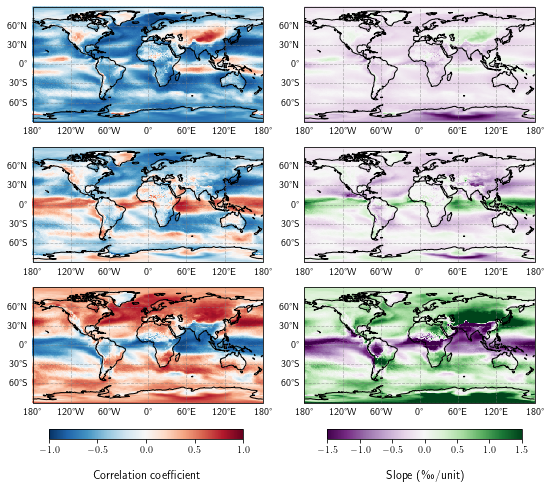

In [4]:
# Figure 14 - correlations between d-excess, ws_evap, T_evap, RH_evap on monthly timescale

# now make the map plots:
fig = plt.figure(figsize=(9,7))

grid = gridspec.GridSpec(nrows = 3,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap1 = "RdBu_r"
cmap2 = 'PRGn'

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[2], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[4], projection=proj) # lower cell of grid
ax4 = fig.add_subplot(grid[1], projection=proj) # upper cell of grid
ax5 = fig.add_subplot(grid[3], projection=proj) # middle cell of grid
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of grid

# upper panel: annual mean
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(ds.PRECT_dxs,ds.PRECTrhsrf,dim="time").plot(ax = ax1,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1, 
                                  add_colorbar = False)

# middle panel: DJF
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
xr.corr(ds.PRECT_dxs,ds.PRECTtsrf,dim="time").plot(ax = ax2,
                                               cmap = cmap1,
                                               transform = ccrs.PlateCarree(),
                                               vmin = -1,
                                               vmax = 1, 
                                               add_colorbar = False)

# bottom panel: JJA
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
xr.corr(ds.PRECT_dxs,ds.PRECTews,dim="time").plot(ax = ax3,
                                               cmap = cmap1,
                                               transform = ccrs.PlateCarree(),
                                               vmin = -1,
                                               vmax = 1, 
                                               add_colorbar = False)

fig.subplots_adjust(bottom = 0.05, wspace=0.18, hspace=0.02)
cb1_ax = fig.add_axes([0.15, 0.0, 0.3, 0.02])
cbar1 = fig.colorbar(im1, cax=cb1_ax, orientation = 'horizontal')
cbar1.set_label("Correlation coefficient", size = 'large', labelpad = 15)

# middle panel: correlation between d'18O and ln(f)
# plot slope between lnf and d18O at different places
def linear_trend(x,y):
    pf = np.polyfit(x,y,1)
    # need to return a dataarray (is this neeeded?)
    return xr.DataArray(pf[0])

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds.PRECTrhsrf,ds.PRECT_dxs,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)

# upper panel: correlation between d'18O and ln(f)
ax4.coastlines()
gl = ax4.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
slopes.plot(ax=ax4,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1.5, vmax = 1.5,
           add_colorbar = False)

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds.PRECTtsrf,ds.PRECT_dxs,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)

# average slope of d18O vs lnf
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
slopes.plot(ax=ax5,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1.5, vmax = 1.5,
           add_colorbar = False)

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds.PRECTews,ds.PRECT_dxs,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)

# average slope of d18O vs lnf
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = slopes.plot(ax=ax6,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1.5, vmax = 1.5,
                 add_colorbar = False)

cb2_ax = fig.add_axes([0.58, 0.0, 0.3, 0.02])
cbar2 = fig.colorbar(im2, cax=cb2_ax, orientation = 'horizontal')
cbar2.set_label("Slope (‰/unit)", size = 'large', labelpad = 15)

plt.draw()
#plt.savefig('plots/fig18.png',dpi=dpi_out,bbox_inches='tight')